In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Read in the data

In [3]:
df = pd.read_csv('/users/anshumantewary/Downloads/Projects/Movies_Python_analysis/movies.csv')

In [4]:
#Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.shape

(7668, 15)

In [6]:
#Lets look at the missing data in these columns

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# Lets run a for loop to determine the same

for i in df.columns:
    total_missing = np.sum((df[i]).isnull())
    print('{} - {}'.format(i, total_missing))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [8]:
#Let's treat the missing values;
# 'budget' and 'gross'

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df['budget'] = df['budget'].fillna(np.median(df['budget']))

In [10]:
df['gross'] = df['gross'].fillna(np.median(df['gross']))

In [11]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [12]:
#Now, we will be dropping the remaining the rows with NA values, since they are categorical in nature

df.dropna(inplace = True)

In [13]:
#Lets change the data types of a few columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [14]:
#Based on the data description, year and released year should be same because they should be same. Let's check

df['released']

0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object

## Using different Sub-string methods

In [15]:
#df['released'].astype(str).str.split(',').str[-1].astype(str).str[:5]

In [16]:
#df['released'].astype('str').str[-20:-15]

In [17]:
#len('(United States)')

In [18]:
#Create a correct year column

df['correct_year'] = df['released'].astype(str).str.split(',').str[-1].str[1:5]

In [19]:
df.tail(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400.0,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000,226421,Emphatic Films,83.0,2020
7616,High on the Hog,R,Action,2019,"April 16, 2019 (United States)",3.5,195.0,Tony Wash,Andy Golub,Sid Haig,United States,1200000,45696,Hicktown Entertainment,85.0,2019
7643,Tenet,PG-13,Action,2020,"September 3, 2020 (United States)",7.4,387000.0,Christopher Nolan,Christopher Nolan,John David Washington,United States,205000000,363656624,Warner Bros.,150.0,2020
7645,Birds of Prey,R,Action,2020,"February 7, 2020 (United States)",6.1,190000.0,Cathy Yan,Christina Hodson,Margot Robbie,United States,84500000,201858461,Clubhouse Pictures (II),109.0,2020
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.1,186000.0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000,143151000,Universal Pictures,124.0,2020
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020


In [20]:
#Lets order the values by gross total

df = df.sort_values('gross', ascending = False)

In [21]:
df['company'].shape

(5421,)

In [22]:
#pd.set_option('display.max_rows', None) #This is usually set to 20. Now it will show the entire dataset

In [23]:
#Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False).shape

#So many duplicates dropped

(1475,)

In [24]:
#Let's try to understand the correlation of these variables with our target variable 'gross'
#Hypothesis is:
#Budget has high correlation with gross
#Company has a high correlation with gross

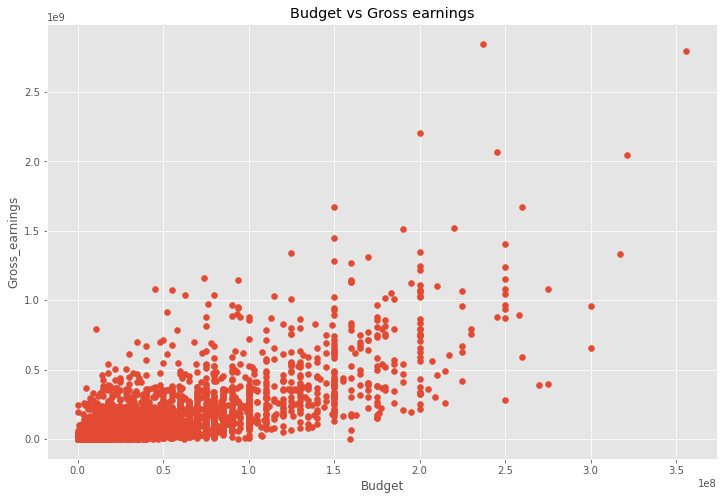

In [25]:
#Scatter plot with budget and gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title("Budget vs Gross earnings")
plt.xlabel("Budget")
plt.ylabel('Gross_earnings')
plt.show()

In [26]:
#df

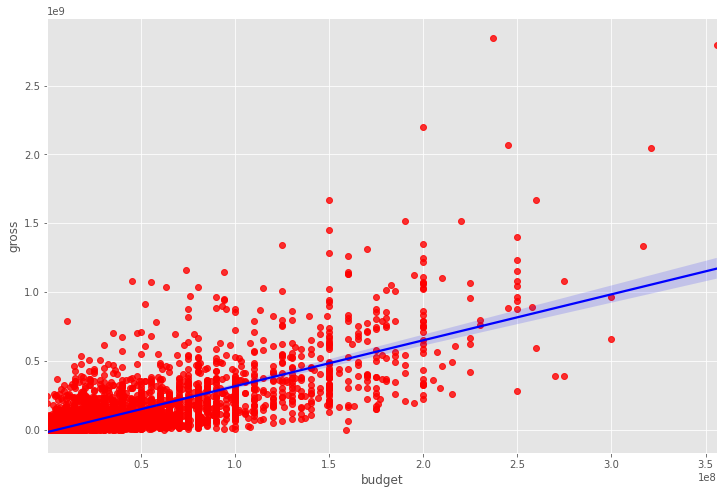

In [27]:
#Lets plot budget vs gross using seaborn
import seaborn as sns

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

In [28]:
#Let's start looking at the corr

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [29]:
#Let's start looking at the corr, in a better way

df.corr(method = 'kendall').iloc[:,-2]

year       0.239539
score      0.124943
votes      0.553625
budget     0.512057
gross      1.000000
runtime    0.176979
Name: gross, dtype: float64

In [30]:
df.corr(method = 'spearman').iloc[:,-2]

year       0.351045
score      0.183192
votes      0.745793
budget     0.692958
gross      1.000000
runtime    0.257400
Name: gross, dtype: float64

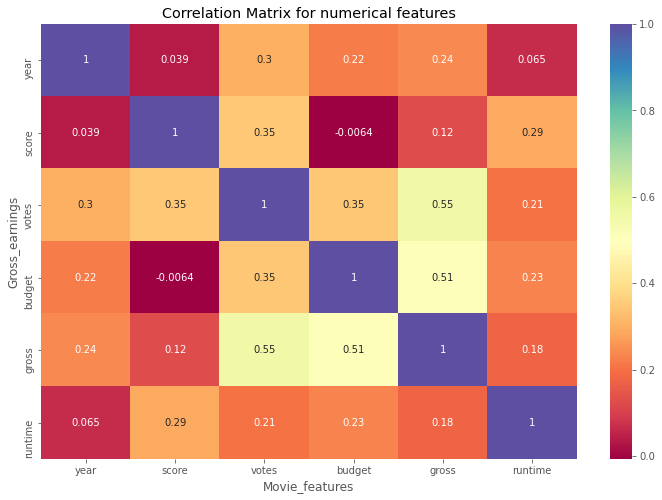

In [31]:
sns.heatmap(df.corr(method = 'kendall'), annot = True, cmap = 'Spectral')
plt.title("Correlation Matrix for numerical features")
plt.xlabel("Movie_features")
plt.ylabel('Gross_earnings')
plt.show()

In [32]:
# Lets look at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [33]:
df['company'].value_counts()

Universal Pictures         330
Columbia Pictures          302
Warner Bros.               298
Paramount Pictures         279
Twentieth Century Fox      209
                          ... 
Three Rivers Production      1
Clavius Base                 1
Pope Productions             1
Vestron Pictures             1
Cinecorp SAC                 1
Name: company, Length: 1475, dtype: int64

In [34]:
df_numerized = df.copy()

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes #assign random numerization

df_numerized 

#All object types are numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,30
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,40
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,18
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,36
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,36
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,15
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,22
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,3


In [35]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


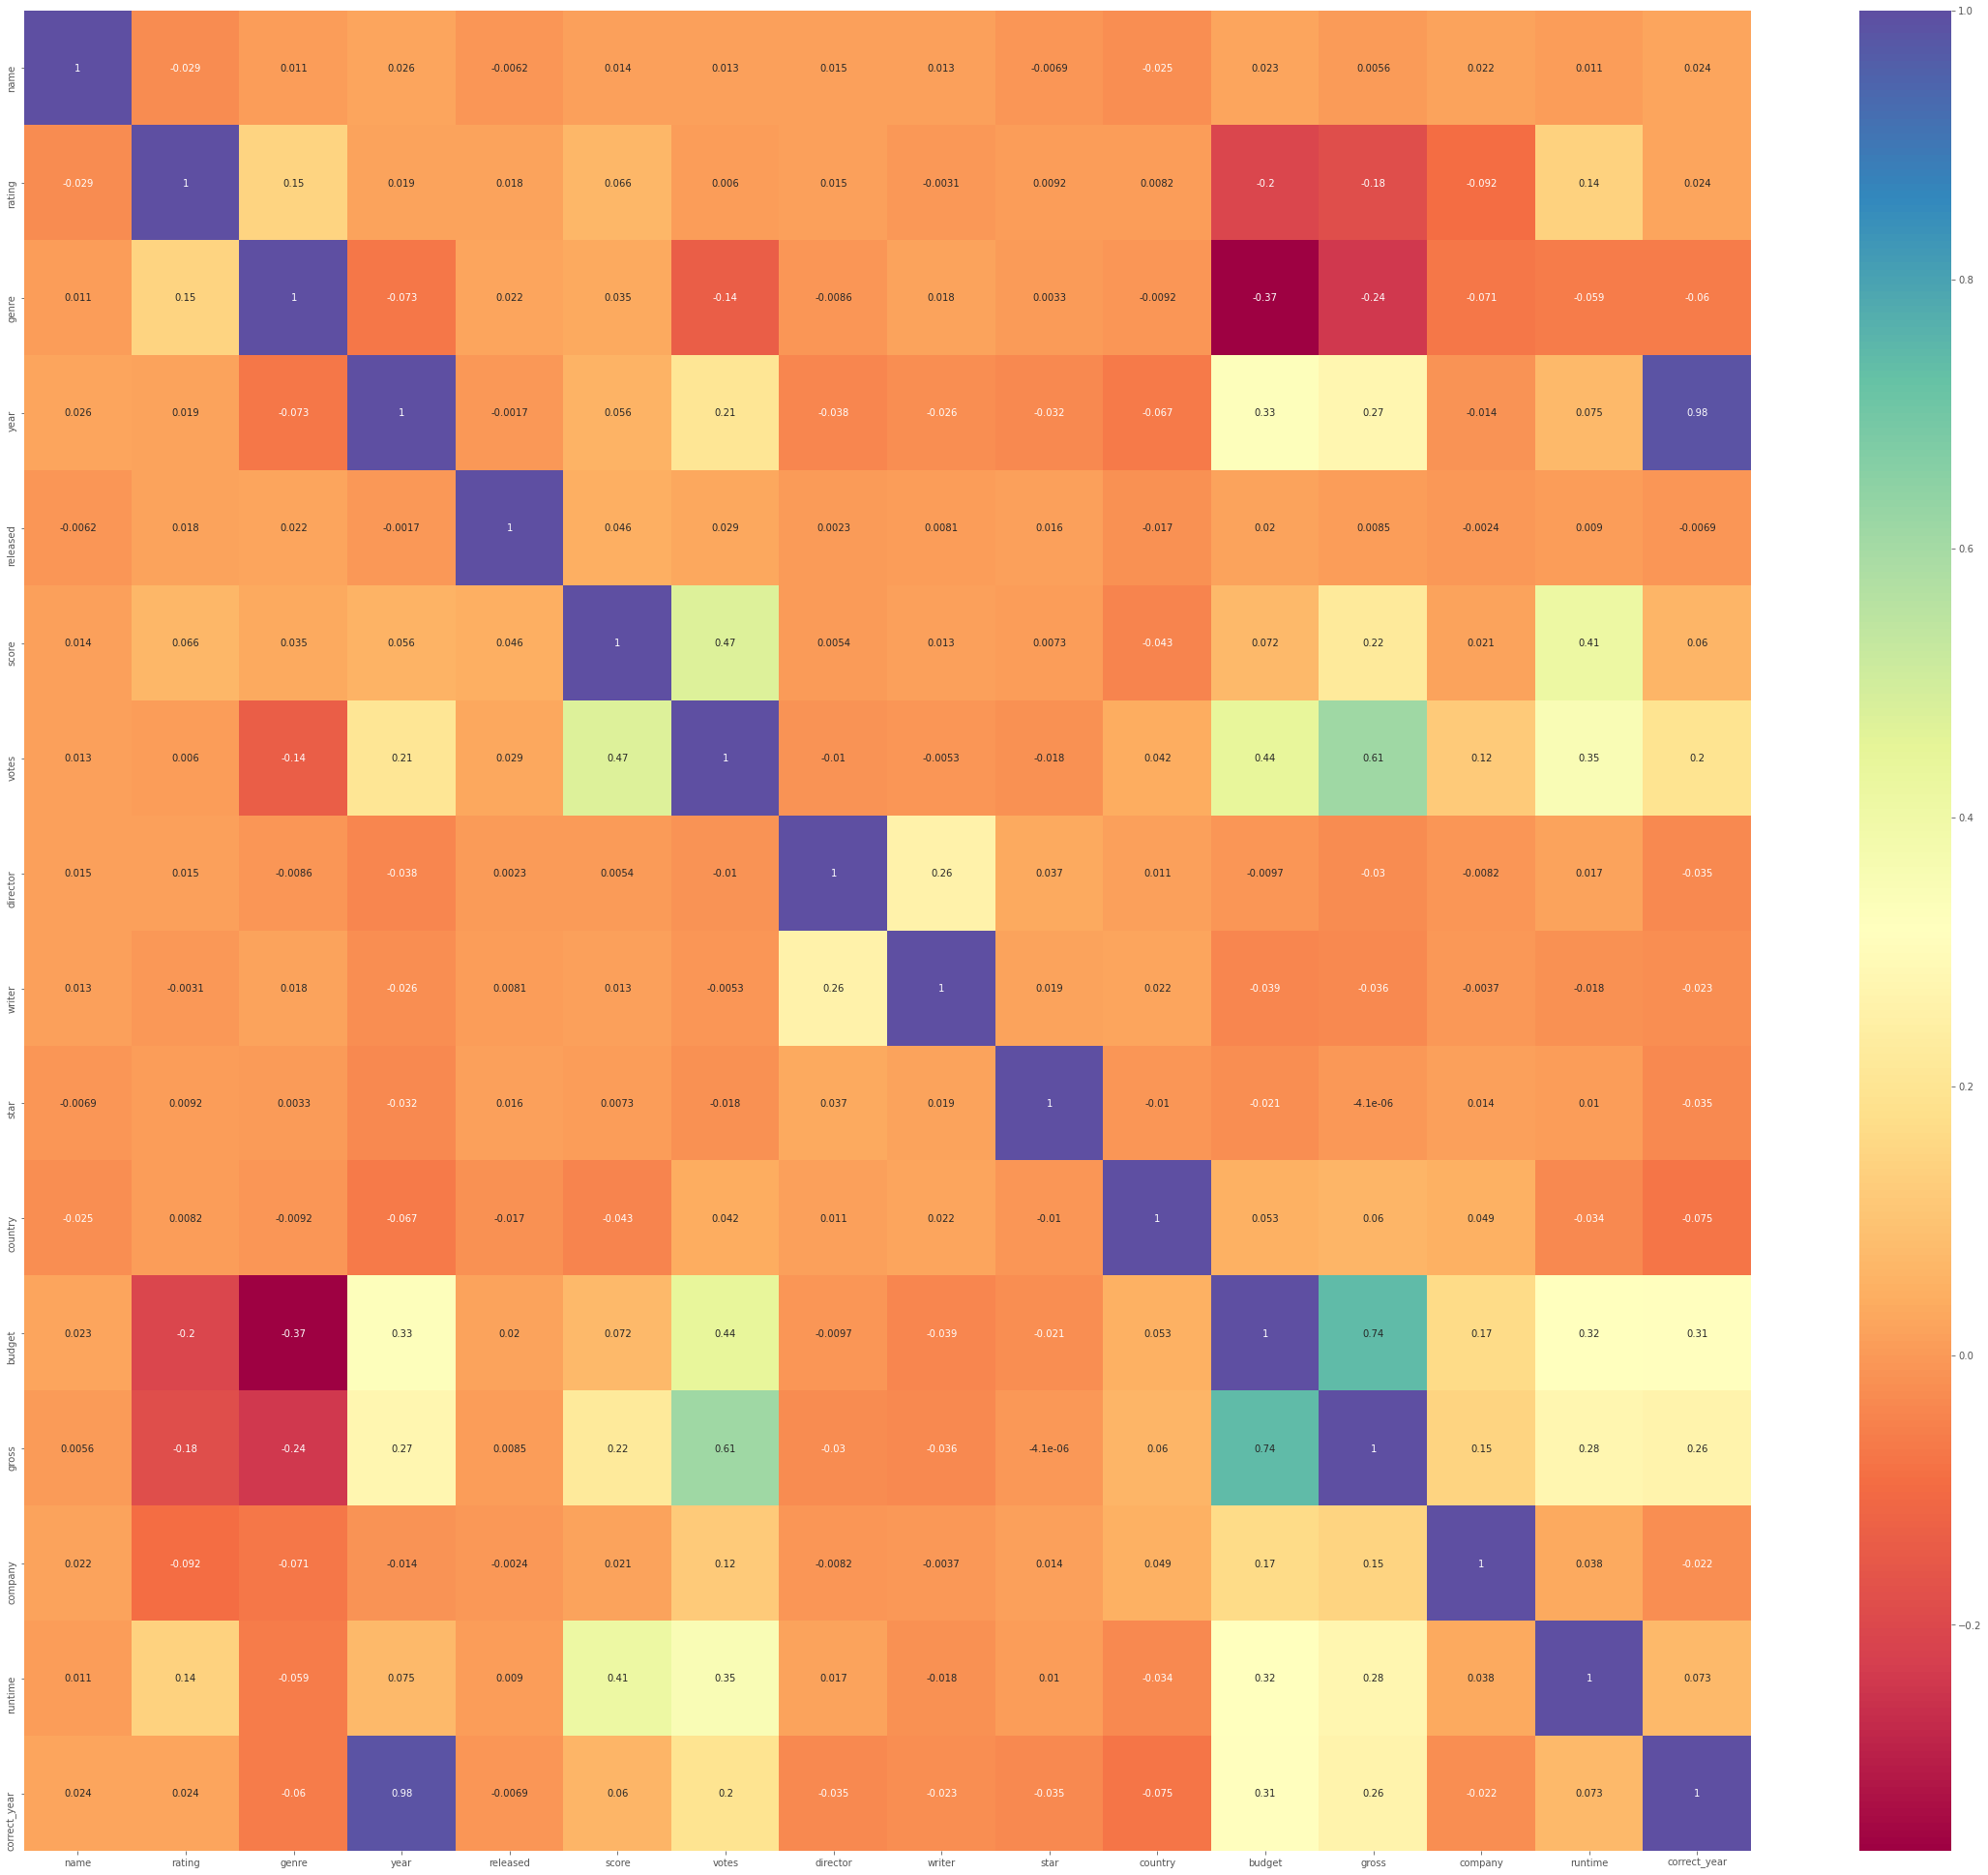

In [41]:
#Lets check the correlation now, with the numerized data
plt.figure(figsize = (40,35))
sns.heatmap(df_numerized.corr(), annot = True, cmap = 'Spectral')
plt.show()

In [43]:
df_numerized.corr().iloc[:,-4]

name            0.005639
rating         -0.181906
genre          -0.244101
year            0.274321
released        0.008501
score           0.222556
votes           0.614751
director       -0.029560
writer         -0.035885
star           -0.000004
country         0.060078
budget          0.740247
gross           1.000000
company         0.149553
runtime         0.275796
correct_year    0.263450
Name: gross, dtype: float64

In [45]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

In [46]:
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
                                ...   
correct_year  budget          0.313588
              gross           0.263450
              company        -0.022097
              runtime         0.072679
              correct_year    1.000000
Length: 256, dtype: float64

In [47]:
pd.set_option('display.max_rows', None)

In [51]:
sorted_pairs = corr_pairs.sort_values(ascending = False)

In [54]:
high_correlation = sorted_pairs[sorted_pairs > 0.5]

In [55]:
high_correlation

name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
correct_year  correct_year    1.000000
              year            0.984143
year          correct_year    0.984143
budget        gross           0.740247
gross         budget          0.740247
votes         gross           0.614751
gross         votes           0.614751
dtype: float64

In [ ]:
#Votes and budget have the highest correlation for gross